## Import Library

In [1]:
import numpy as np
import tensorflow as tf
import nltk
from keras.preprocessing.text import Tokenizer
import random
from gensim.models import Word2Vec
from keras import regularizers
from keras.utils import pad_sequences, to_categorical
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, GlobalMaxPooling1D, GlobalAveragePooling1D, Dropout, LeakyReLU, Flatten
from keras.optimizers import Adam, RMSprop
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.callbacks import CSVLogger
import pandas as pd
import regex as re
import string
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
df = pd.read_csv('D:/SEMESTER 8/TUGAS AKHIR/FINAL TA/Dataset_BBM_preprocessedd.csv')
df

,,Labels,tweet_stemmed
0,@username sirait. sirait. kok otak kamu cetek ...,2,sirait sirait otak cetek iya harga minyak turu...
1,lain halnya islam yang mengelola sda minyak da...,1,hal islam kelola minyak gas bumi buat syariat ...
2,kenaikan bahan bakar minyak seringkali diikuti...,0,naik bahan bakar minyak seringkali ikut naik h...
3,"harga bahan bakar minyak naik, pemerintah dide...",0,harga bahan bakar minyak naik perintah desak b...
4,"selesai zuhur angin bertiup kencang, entah apa...",0,selesai zuhur angin tiup kencang sebab pesan g...
...,...,...,...
17602,"kemarin pagi baru isi, lain kali isi berarti s...",0,kemarin pagi isi kali isi harga naik naik harg...
17603,ngomong-ngomong harga bahan bakar minyak jadi ...,2,bicara bicara harga bahan bakar minyak naik pa...
17604,@username intinya harga bahan bakar minyak di ...,1,inti harga bahan bakar minyak era jokuwi mahal...
17605,"sungguh ironis bahan bakar minyak naik dratis,...",2,sungguh ironis bahan bakar minyak naik drastis...


In [3]:
df = df.loc[:, ['tweet_stemmed','Labels']]
df

,tweet_stemmed,Labels
0,sirait sirait otak cetek iya harga minyak turu...,2
1,hal islam kelola minyak gas bumi buat syariat ...,1
2,naik bahan bakar minyak seringkali ikut naik h...,0
3,harga bahan bakar minyak naik perintah desak b...,0
4,selesai zuhur angin tiup kencang sebab pesan g...,0
...,...,...
17602,kemarin pagi isi kali isi harga naik naik harg...,0
17603,bicara bicara harga bahan bakar minyak naik pa...,2
17604,inti harga bahan bakar minyak era jokuwi mahal...,1
17605,sungguh ironis bahan bakar minyak naik drastis...,2


In [4]:
sentiment_counts = df['Labels'].value_counts()
sentiment_counts

Labels
2    6178
1    5813
0    5616
Name: count, dtype: int64

## Distribusi data

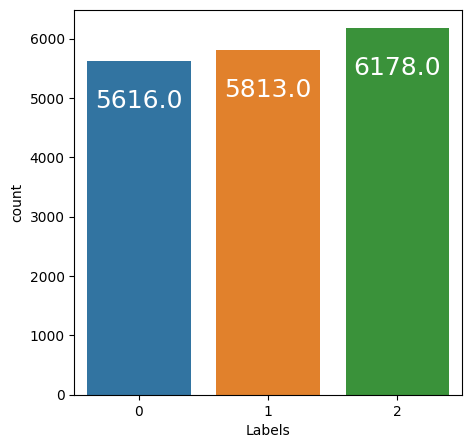

In [5]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=df['Labels'])

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17607 entries, 0 to 17606
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_stemmed  17607 non-null  object
 1   Labels         17607 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 275.2+ KB


0 = netral
1 = positif
2 = negatif

In [7]:
# Split the dataset into text and labels
text_clean, labels = df['tweet_stemmed'].astype(str), df['Labels']
text_clean

0        sirait sirait otak cetek iya harga minyak turu...
1        hal islam kelola minyak gas bumi buat syariat ...
2        naik bahan bakar minyak seringkali ikut naik h...
3        harga bahan bakar minyak naik perintah desak b...
4        selesai zuhur angin tiup kencang sebab pesan g...
                               ...                        
17602    kemarin pagi isi kali isi harga naik naik harg...
17603    bicara bicara harga bahan bakar minyak naik pa...
17604    inti harga bahan bakar minyak era jokuwi mahal...
17605    sungguh ironis bahan bakar minyak naik drastis...
17606    sedia bahan bakar minyak harga daerah indonesi...
Name: tweet_stemmed, Length: 17607, dtype: object

In [8]:
labels

0        2
1        1
2        0
3        0
4        0
        ..
17602    0
17603    2
17604    1
17605    2
17606    1
Name: Labels, Length: 17607, dtype: int64

In [9]:
df

,tweet_stemmed,Labels
0,sirait sirait otak cetek iya harga minyak turu...,2
1,hal islam kelola minyak gas bumi buat syariat ...,1
2,naik bahan bakar minyak seringkali ikut naik h...,0
3,harga bahan bakar minyak naik perintah desak b...,0
4,selesai zuhur angin tiup kencang sebab pesan g...,0
...,...,...
17602,kemarin pagi isi kali isi harga naik naik harg...,0
17603,bicara bicara harga bahan bakar minyak naik pa...,2
17604,inti harga bahan bakar minyak era jokuwi mahal...,1
17605,sungguh ironis bahan bakar minyak naik drastis...,2


## Ukuran data

In [10]:
df['word_length'] = df['tweet_stemmed'].str.split().str.len()

In [11]:
df = df[df['word_length'] >= 1]

In [12]:
df['word_length'] = df['word_length'].apply(np.int64)

In [13]:
unique, counts = np.unique(df['word_length'], return_counts=True)
dict(zip(unique, counts))

{1: 2,
 3: 4,
 4: 4,
 5: 88,
 6: 223,
 7: 435,
 8: 603,
 9: 865,
 10: 919,
 11: 1079,
 12: 1045,
 13: 859,
 14: 934,
 15: 843,
 16: 813,
 17: 765,
 18: 757,
 19: 735,
 20: 724,
 21: 727,
 22: 625,
 23: 604,
 24: 626,
 25: 528,
 26: 457,
 27: 439,
 28: 406,
 29: 306,
 30: 273,
 31: 239,
 32: 163,
 33: 155,
 34: 90,
 35: 76,
 36: 60,
 37: 33,
 38: 23,
 39: 15,
 40: 17,
 41: 13,
 42: 4,
 43: 8,
 44: 2,
 46: 8,
 47: 4,
 48: 2,
 49: 2,
 50: 2,
 52: 2,
 56: 1}

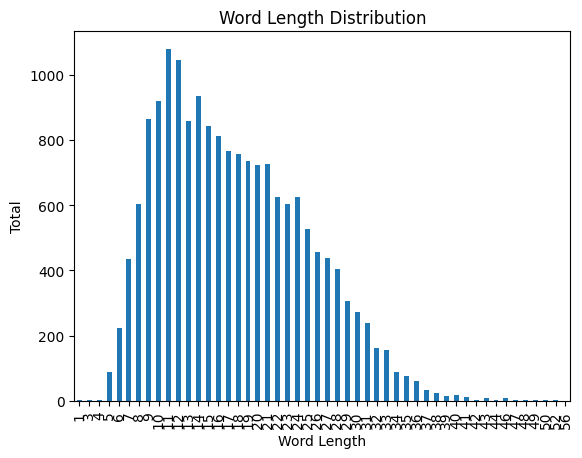

<Figure size 800x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

df['word_length'].value_counts().sort_index().plot.bar()
plt.xlabel('Word Length')
plt.ylabel('Total')
plt.title('Word Length Distribution')
plt.figure().set_figwidth(8)
plt.show()

## Eksperimen

### Word2vec Skip-gram = 100, 200, 300

In [15]:
# model_sg = Word2Vec.load('D:/SEMESTER 8/TUGAS AKHIR/Bismillah TA/idwiki_word2vec_100_sg.model')

In [43]:
# model_sg = Word2Vec.load('D:/SEMESTER 8/TUGAS AKHIR/Bismillah TA/idwiki_word2vec_200_sg.model')

In [67]:
model_sg = Word2Vec.load('D:/SEMESTER 8/TUGAS AKHIR/Bismillah TA/idwiki_word2vec_300_sg.model')

In [68]:
model_sg.wv.key_to_index

{'dan': 0,
 'yang': 1,
 'di': 2,
 'pada': 3,
 'dari': 4,
 'dengan': 5,
 'ini': 6,
 'untuk': 7,
 'dalam': 8,
 'adalah': 9,
 'tahun': 10,
 'kategori': 11,
 'sebagai': 12,
 'oleh': 13,
 'the': 14,
 'ke': 15,
 'juga': 16,
 'of': 17,
 'tidak': 18,
 'menjadi': 19,
 'ia': 20,
 'atau': 21,
 'merupakan': 22,
 'referensi': 23,
 'indonesia': 24,
 'film': 25,
 'tersebut': 26,
 'itu': 27,
 'mereka': 28,
 'sebuah': 29,
 'orang': 30,
 'dapat': 31,
 'kota': 32,
 'luar': 33,
 'satu': 34,
 'bagian': 35,
 'memiliki': 36,
 'telah': 37,
 'bahwa': 38,
 'karena': 39,
 'lebih': 40,
 'setelah': 41,
 'seperti': 42,
 'pertama': 43,
 'akan': 44,
 'seorang': 45,
 'secara': 46,
 'pranala': 47,
 'besar': 48,
 'dia': 49,
 'nama': 50,
 'saat': 51,
 'and': 52,
 'beberapa': 53,
 'bahasa': 54,
 'kemudian': 55,
 'negara': 56,
 'amerika': 57,
 'spesies': 58,
 'desa': 59,
 'ada': 60,
 'lain': 61,
 'dua': 62,
 'in': 63,
 'dunia': 64,
 'selatan': 65,
 'tanggal': 66,
 'wilayah': 67,
 'banyak': 68,
 'antara': 69,
 'baru': 70,
 

In [69]:
tokenized_dataset = [text.split() for text in text_clean]

In [70]:
tokenized_dataset[0]

['sirait',
 'sirait',
 'otak',
 'cetek',
 'iya',
 'harga',
 'minyak',
 'turun',
 'bahan',
 'bakar',
 'minyak',
 'turun',
 'harga',
 'minyak',
 'naik',
 'bahan',
 'bakar',
 'minyak',
 'naik',
 'bodoh',
 'pamer',
 'iya',
 'rakyat',
 'bingung']

In [71]:
print(len(model_sg.wv.key_to_index))
vocab_size=len(model_sg.wv.key_to_index)

445726


In [72]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(text_clean)

In [73]:
X_train, X_val, y_train, y_val = train_test_split(text_clean, labels, test_size = 0.2, shuffle=True, random_state=42)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

padded_train = pad_sequences(X_train_seq, padding='post', maxlen=64)
padded_val = pad_sequences(X_val_seq, padding='post', maxlen=64)

In [74]:
y_val.value_counts()

Labels
2    1268
1    1140
0    1114
Name: count, dtype: int64

In [75]:
len(model_sg.wv)

445726

In [76]:
limited_vocab_words = {word: model_sg.wv.key_to_index[word] for word in model_sg.wv.index_to_key}
limited_vocab_words['OOV'] = len(model_sg.wv)
vocab_size = len(limited_vocab_words) + 1

In [77]:
vocab_size

445728

In [78]:
padded_train.shape

(14085, 64)

In [79]:
tokenizer.sequences_to_texts(padded_train)

['indonesia negara krisis bangkrut ekonomi indonesia pimpin presiden jokowi relatif stabil makan warung tegal langgan harga stabil naik harga bahan bakar minyak OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV',
 'perintah bantu langsung tunai masyarakat kurang dampak naik harga bahan bakar minyak salur bantu langsung tunai bahan bakar minyak sasar harap jaga daya beli masyarakat stabil pertalite hemat hemat OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV',
 'bijak sesuai harga bahan bakar minyak wajar hilang subsidi rakyat bijak alih subsidi bbmini bagai selamat ekonomi indonesia sesuai harga bahan bakar minyak pengaruh daya beli masyarakat bantu langsung tunai jalan OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV OOV 

In [80]:
padded_train[1]

array([ 10,  21,  29,  46,  11, 130,  32,   2,   3,   5,   6,   4,  88,
        21,  29,  46,   5,   6,   4,  80, 192, 134,  79,  17,  11, 120,
        28,  95,  95,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

In [81]:
embed_dim = model_sg.vector_size # embedding
embedding_matrix_sg = np.zeros((vocab_size, embed_dim))
for word, i in limited_vocab_words.items():
    if word in model_sg.wv:
        embedding_matrix_sg[i] = model_sg.wv[word]

# CNN-BiLSTM

In [82]:
# Hybrid CNN-BiLSTM
model_sg = Sequential()
model_sg.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, weights=[embedding_matrix_sg], input_length=64, trainable=False))
model_sg.add(Conv1D(64, 5, activation='relu', padding='same'))
model_sg.add(MaxPooling1D(2, padding='same'))
model_sg.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
model_sg.add(Dense(128, activation='relu'))
model_sg.add(Dropout(.2))
model_sg.add(Dense(32, activation='relu'))
model_sg.add(Dropout(.2))
model_sg.add(Dense(3, activation='softmax'))

optimizer = Adam (learning_rate=0.001)
model_sg.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model_sg.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 64, 300)           133718400 
                                                                 
 conv1d_3 (Conv1D)           (None, 64, 64)            96064     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 32, 64)           0         
 1D)                                                             
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              197632    
 nal)                                                            
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)              

In [83]:
# csv_logger = CSVLogger('D:/SEMESTER 8/TUGAS AKHIR/FINAL TA/log_sg_100.csv')
# csv_logger = CSVLogger('D:/SEMESTER 8/TUGAS AKHIR/FINAL TA/log_sg_200.csv')
csv_logger = CSVLogger('D:/SEMESTER 8/TUGAS AKHIR/FINAL TA/log_sg_300.csv')

In [84]:
# Train the sg model
model_sg.fit(padded_train, to_categorical(y_train, num_classes=3), batch_size=128, epochs=10, validation_data=(padded_val, to_categorical(y_val, num_classes=3)), callbacks=[callback, csv_logger])

Epoch 1/10
111/111 [==============================] - 26s 200ms/step - loss: 1.0381 - accuracy: 0.4425 - val_loss: 0.9451 - val_accuracy: 0.5613
Epoch 2/10
111/111 [==============================] - 22s 203ms/step - loss: 0.8999 - accuracy: 0.5870 - val_loss: 0.8897 - val_accuracy: 0.5920
Epoch 3/10
111/111 [==============================] - 20s 183ms/step - loss: 0.7539 - accuracy: 0.6809 - val_loss: 0.9192 - val_accuracy: 0.5840
Epoch 4/10
111/111 [==============================] - 19s 173ms/step - loss: 0.6406 - accuracy: 0.7397 - val_loss: 0.6781 - val_accuracy: 0.7223
Epoch 5/10
111/111 [==============================] - 19s 167ms/step - loss: 0.5159 - accuracy: 0.7989 - val_loss: 0.6077 - val_accuracy: 0.7575
Epoch 6/10
111/111 [==============================] - 18s 161ms/step - loss: 0.4088 - accuracy: 0.8462 - val_loss: 0.6086 - val_accuracy: 0.7558
Epoch 7/10
111/111 [==============================] - 21s 188ms/step - loss: 0.3517 - accuracy: 0.8672 - val_loss: 0.5946 - val_ac

In [85]:
# model_sg100 = model_sg
# model_sg200 = model_sg
model_sg200 = model_sg

## Grafik comparison

### sg 100,200,300

In [36]:
sg100 = pd.read_csv('D:/SEMESTER 8/TUGAS AKHIR/FINAL TA/log_sg_100.csv')
akurasi_sg100 = max(sg100['val_accuracy'])
akurasi_sg100

0.7754117250442505

In [66]:
sg200 = pd.read_csv('D:/SEMESTER 8/TUGAS AKHIR/FINAL TA/log_sg_200.csv')
akurasi_sg200 = max(sg200['val_accuracy'])
akurasi_sg200

0.8302100896835327

In [86]:
sg300 = pd.read_csv('D:/SEMESTER 8/TUGAS AKHIR/FINAL TA/log_sg_300.csv')
akurasi_sg300 = max(sg300['val_accuracy'])
akurasi_sg300

0.8489494323730469

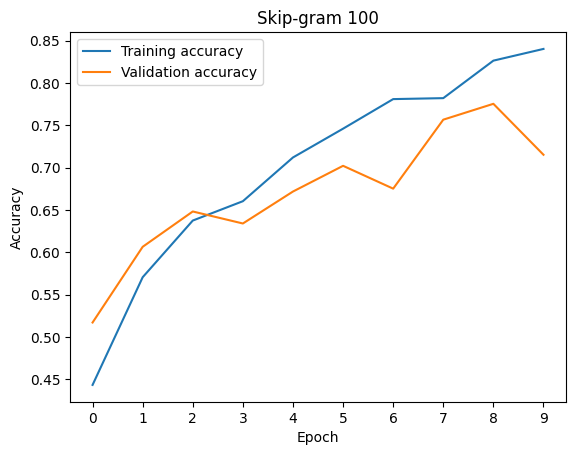

In [41]:
plt.title("Skip-gram 100")
plt.plot(sg100['epoch'], sg100['accuracy'], label='Training accuracy')
plt.plot(sg100['epoch'], sg100['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(sg100['epoch'])
plt.legend()
plt.show()

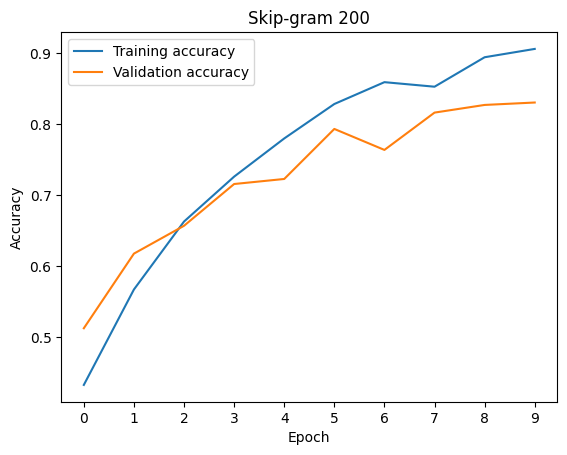

In [63]:
plt.title("Skip-gram 200")
plt.plot(sg200['epoch'], sg200['accuracy'], label='Training accuracy')
plt.plot(sg200['epoch'], sg200['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(sg200['epoch'])
plt.legend()
plt.show()

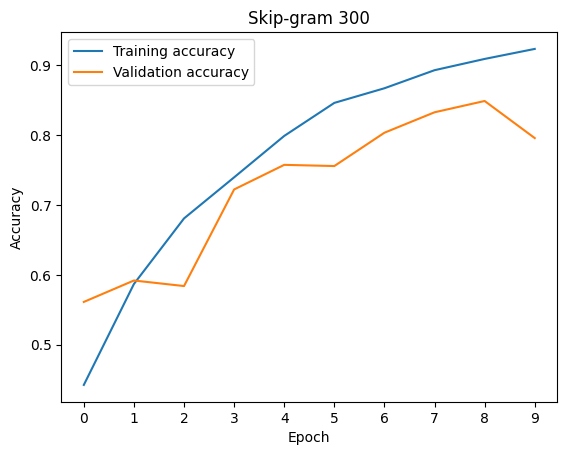

In [87]:
plt.title("Skip-gram 300")
plt.plot(sg300['epoch'], sg300['accuracy'], label='Training accuracy')
plt.plot(sg300['epoch'], sg300['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(sg300['epoch'])
plt.legend()
plt.show()

#### Perbandingan 100,200,300

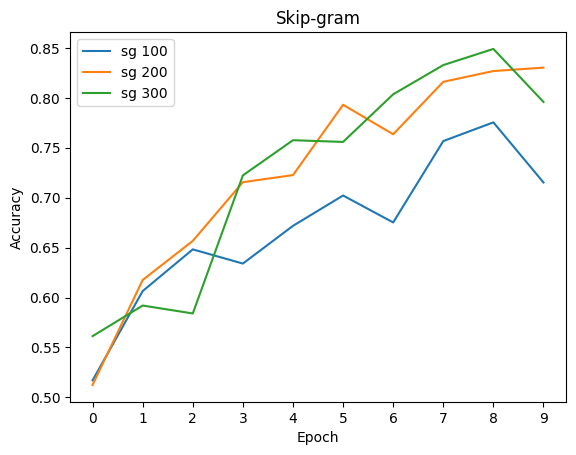

In [111]:
plt.title("Skip-gram")
plt.plot(sg100['epoch'], sg100['val_accuracy'], label='sg 100')
plt.plot(sg200['epoch'], sg200['val_accuracy'], label='sg 200')
plt.plot(sg300['epoch'], sg300['val_accuracy'], label='sg 300')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(sg200['epoch'])
plt.legend()
plt.show()

### Skip-gram 100,200,300

## Confusion Matrix

#### sg 100

  1/111 [..............................] - ETA: 5s

111/111 [==============================] - 2s 13ms/step


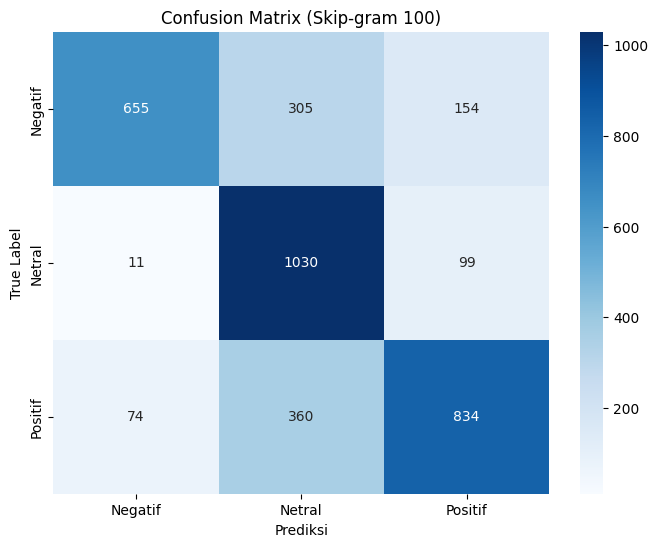

In [42]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_sg100 = np.argmax(model_sg100.predict(padded_val), axis=1)
cm_sg100 = confusion_matrix(y_val, y_pred_sg100)

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sg100, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Skip-gram 100)')
plt.show()

In [108]:
print(classification_report(y_val, y_pred_sg100))

              precision    recall  f1-score   support

           0       0.89      0.59      0.71      1114
           1       0.61      0.90      0.73      1140
           2       0.77      0.66      0.71      1268

    accuracy                           0.72      3522
   macro avg       0.75      0.72      0.71      3522
weighted avg       0.75      0.72      0.71      3522



#### sg 200

111/111 [==============================] - 2s 11ms/step


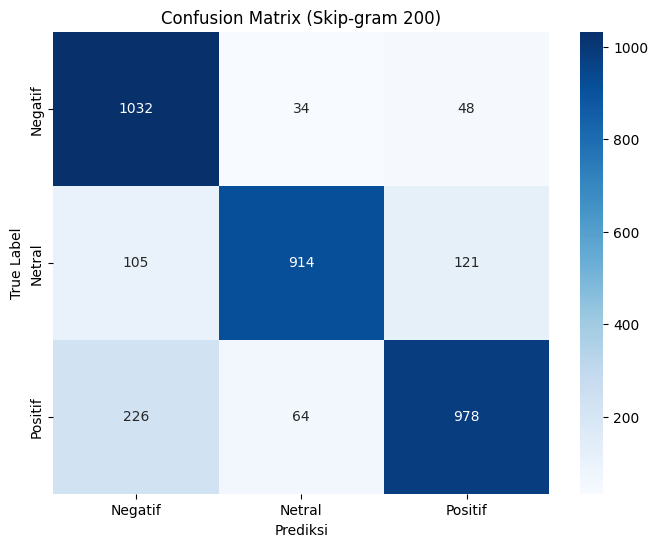

In [64]:
y_pred_sg200 = np.argmax(model_sg200.predict(padded_val), axis=1)
cm_sg200 = confusion_matrix(y_val, y_pred_sg200)

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sg200, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Skip-gram 200)')
plt.show()

In [109]:
print(classification_report(y_val, y_pred_sg200))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83      1114
           1       0.90      0.80      0.85      1140
           2       0.85      0.77      0.81      1268

    accuracy                           0.83      3522
   macro avg       0.84      0.83      0.83      3522
weighted avg       0.84      0.83      0.83      3522



#### sg 300

  1/111 [..............................] - ETA: 4s

111/111 [==============================] - 2s 15ms/step


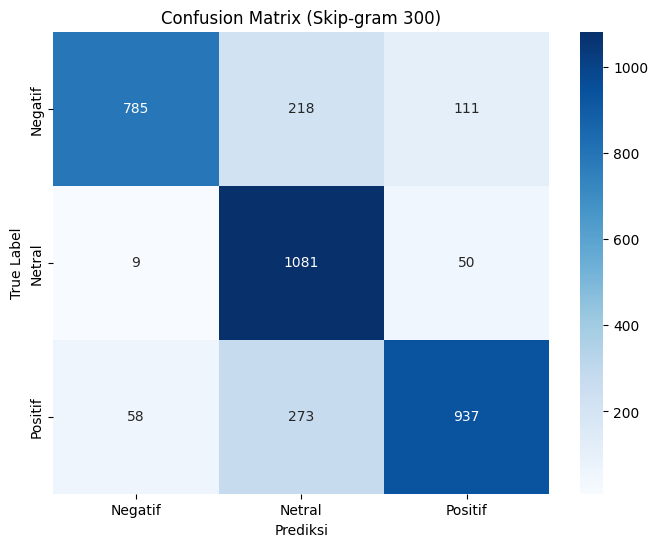

In [90]:
y_pred_sg300 = np.argmax(model_sg.predict(padded_val), axis=1)
cm_sg300 = confusion_matrix(y_val, y_pred_sg300)

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sg300, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Skip-gram 300)')
plt.show()

In [110]:
print(classification_report(y_val, y_pred_sg300))

              precision    recall  f1-score   support

           0       0.92      0.70      0.80      1114
           1       0.69      0.95      0.80      1140
           2       0.85      0.74      0.79      1268

    accuracy                           0.80      3522
   macro avg       0.82      0.80      0.80      3522
weighted avg       0.82      0.80      0.80      3522



In [92]:
akurasi_sg100 = accuracy_score(y_val, y_pred_sg100)
akurasi_sg200 = accuracy_score(y_val, y_pred_sg200)
akurasi_sg300 = accuracy_score(y_val, y_pred_sg300)

In [93]:
import pandas as pd

# Data model dan akurasi
data = {'Model': ['sg 100', 'sg 200', 'sg 300'],
        'Accuracy': [akurasi_sg100, akurasi_sg200, akurasi_sg300]}

# Membuat dataframe
df_akurasi = pd.DataFrame(data)

# Menampilkan dataframe
print(df_akurasi)

    Model  Accuracy
0  sg 100  0.715219
1  sg 200  0.830210
2  sg 300  0.795855


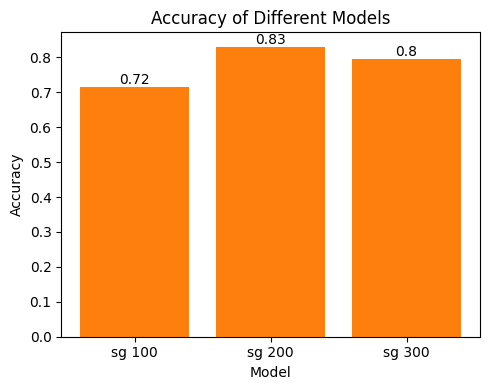

In [107]:
# Create the bar plot
plt.figure(figsize=(5, 4))

# Define a list of colors for the bars
colors = ['#ff7f0e']

bars = plt.bar(df_akurasi['Model'], df_akurasi['Accuracy'], color=colors)

plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## K-fold Cross validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data pelatihan dan data validasi menggunakan train_test_split
# X_train, X_val, y_train, y_val = train_test_split(text_clean, labels, test_size=0.2, train_size=0.8, shuffle=True, random_state=11)

# Menentukan jumlah lipatan (k) untuk cross-validation
k = 5

# Inisialisasi list untuk menyimpan hasil akurasi pada setiap lipatan
accuracies = []

# Membagi data pelatihan menjadi k lipatan
kf = KFold(n_splits=k, shuffle=True)

# Melakukan k-fold cross-validation
for train_index, val_index in kf.split(text_clean, labels):
    # Membagi data pelatihan menjadi data pelatihan dan data validasi pada setiap lipatan
    X_train_fold, X_val_fold = text_clean[train_index], text_clean[val_index]
    y_train_fold, y_val_fold = labels[train_index], labels[val_index]

    X_train_fold_seq = tokenizer.texts_to_sequences(X_train_fold)
    X_val_fold_seq = tokenizer.texts_to_sequences(X_val_fold)

    padded_train_fold = pad_sequences(X_train_fold_seq , padding='post', maxlen=64)
    padded_val_fold = pad_sequences(X_val_fold_seq , padding='post', maxlen=64)

    # Membangun dan melatih model pada data pelatihan lipatan
    model_sg = Sequential()
    model_sg.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, weights=[embedding_matrix_sg], input_length=64, trainable=False))
    model_sg.add(Conv1D(128, 5, activation='relu', padding='same'))
    model_sg.add(MaxPooling1D(3, padding='same'))
    model_sg.add(Bidirectional(LSTM(64)))
    model_sg.add(Dense(64, activation='relu'))
    model_sg.add(Dropout(.2))
    model_sg.add(Dense(32, activation='relu'))
    model_sg.add(Dropout(.2))
    model_sg.add(Dense(3, activation='softmax'))

    optimizer = Adam (learning_rate=0.0001)
    model_sg.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    
    model_sg.fit(padded_train_fold, to_categorical(y_train_fold), batch_size=128, epochs=20, validation_data=(padded_val_fold, to_categorical(y_val_fold)))
    
    # Menghitung akurasi pada data validasi lipatan
    _, accuracy = model_sg.evaluate(padded_val_fold, to_categorical(y_val_fold))
    accuracies.append(accuracy)

# Menghitung rata-rata akurasi dari k lipatan
average_accuracy = np.mean(accuracies)

print("Average Accuracy:", average_accuracy)


Epoch 1/20
210/210 [==============================] - 14s 50ms/step - loss: 1.0457 - accuracy: 0.4474 - val_loss: 1.0029 - val_accuracy: 0.5037
Epoch 2/20
210/210 [==============================] - 10s 46ms/step - loss: 0.9842 - accuracy: 0.5201 - val_loss: 0.9499 - val_accuracy: 0.5566
Epoch 3/20
210/210 [==============================] - 9s 45ms/step - loss: 0.9319 - accuracy: 0.5631 - val_loss: 0.9171 - val_accuracy: 0.5752
Epoch 4/20
210/210 [==============================] - 10s 45ms/step - loss: 0.9035 - accuracy: 0.5865 - val_loss: 0.9029 - val_accuracy: 0.5832
Epoch 5/20
210/210 [==============================] - 9s 45ms/step - loss: 0.8726 - accuracy: 0.6099 - val_loss: 0.8818 - val_accuracy: 0.5957
Epoch 6/20
210/210 [==============================] - 9s 45ms/step - loss: 0.8454 - accuracy: 0.6244 - val_loss: 0.8730 - val_accuracy: 0.5999
Epoch 7/20
210/210 [==============================] - 10s 46ms/step - loss: 0.8241 - accuracy: 0.6384 - val_loss: 0.8724 - val_accuracy: 0.